# Compresión de imágenes usando SVD

### Alberto Márquez
### María Vara
### Darío Sotelo

#### Análisis Aplicado

Importamos las siguientes paqueterías:

In [1]:
import numpy as np
from scipy.linalg import svd
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os

El método es:

In [19]:
def singular_value_descomposition(Mat):
    aux1 = np.dot(Mat, Mat.T)
    
    #Primero vamos a obtener los eigenvalores y eigenvectores de la matriz
    eigval, eigvec = np.linalg.eig(aux1)
    
    
    #En esta línea se ordenan los eigenvalores en orden ascendente con la función argsort()
    #y después se revierte el orden del arreglo con la instrucción [::-1], ahora tenemos una lista de 
    #eigenvalores ordenados de forma descendiente
    eigenval_desc = np.argsort(eigval)[::-1]
    
    
    #En la siguiente línea se le asigna a U el valor de los eigenvectores correspondientes a los eigenvalores
    #de forma descendente.
    U = eigvec[:, eigenval_desc]
    
    
    #La siguiente matriz que vamos a obtener es Vt
    #primero calculamos el producto de Mt*M
    aux2 = np.dot(Mat.T, Mat)
    
    #Se obtienen los eigenvalores y eigenvectores de las matrices multiplicadas
    eigval, eigvec = np.linalg.eig(aux2)
    
    #Se vuelven a ordenar de igual forma que la matriz U
    eigenval_desc = np.argsort(eigval)[::-1]
    
    Vt = eigvec[:, eigenval_desc].T
    
    #Por último tenemos que obtener la matriz sigma, la cual tenemos que descartar un tamaño,
    #es decir, nos vamos a quedar con una matriz cuadrada y tenemos que medir el tamaño de la multiplicación
    mat_calc = np.dot(Mat.T, Mat) if (np.size(np.dot(Mat, Mat.T)) > np.size(np.dot(Mat.T, Mat))) else np.dot(Mat, Mat.T)
    
    #En esta línea se sacan los eigenvalores y eigenvectores de la matriz que resultó ser la "buena" (cambiar esta palabra)
    eigval, eigvec = np.linalg.eig(mat_calc)
    
    #Se le aplica la raíz a los eigenvalores
    eigval = np.sqrt(eigval)
    
    sigma = eigval[::-1]
    
    return U, sigma, Vt

In [24]:
A = np.array([[1,3,5],[11,2,6]])

U, Sigma, Vt = singular_value_descomposition(A)
print("-------------------U-------------------")
print(U)
print("\n--------------Sigma----------------")
print(Sigma)
print("\n-------------V transpuesta---------------")
print(Vt)


newSigma = np.zeros((2, 3))
newSigma[:2, :2] = np.diag(Sigma[:2])

print(A,"\n")

A_remake = (U @ newSigma @ Vt)
print(A_remake)

-------------------U-------------------
[[-0.31502054 -0.94908485]
 [-0.94908485  0.31502054]]

--------------Sigma----------------
[13.28910285  4.40451422]

-------------V transpuesta---------------
[[ 0.80930625  0.21395209  0.54703556]
 [ 0.57126414 -0.50339569 -0.64826696]
 [-0.13667727 -0.8371483   0.52962444]]
[[ 1  3  5]
 [11  2  6]] 

[[-5.77606273  1.20864749  0.41984597]
 [-9.41472779 -3.39693557 -7.79895694]]


In [ ]:
def calculU(M): 
    B = np.dot(M, M.T) 
        
    eigenvalues, eigenvectors = np.linalg.eig(B) 
    ncols = np.argsort(eigenvalues)[::-1] 
    
    return eigenvectors[:,ncols]

def calculVt(M): 
    B = np.dot(M.T, M)
        
    eigenvalues, eigenvectors = np.linalg.eig(B) 
    ncols = np.argsort(eigenvalues)[::-1] 
    
    return eigenvectors[:,ncols].T 

def calculSigma(M): 
    if (np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M))): 
        newM = np.dot(M.T, M) 
    else: 
        newM = np.dot(M, M.T) 
        
    eigenvalues, eigenvectors = np.linalg.eig(newM) 
    eigenvalues = np.sqrt(eigenvalues) 
    #Sorting in descending order as the svd function does 
    return eigenvalues[::-1] 

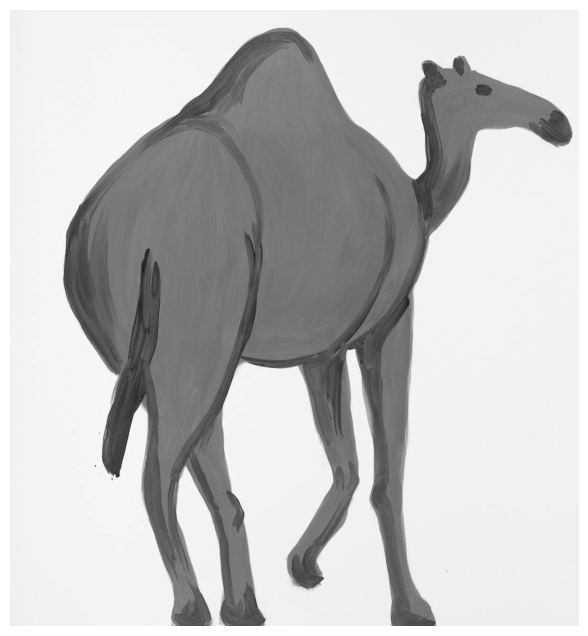

/var/folders/4g/f7823zgx6zx028wv9bfwhkc00000gn/T/ipykernel_60714/2295890971.py:24: RuntimeWarning: invalid value encountered in sqrt
  eigenvalues = np.sqrt(eigenvalues)


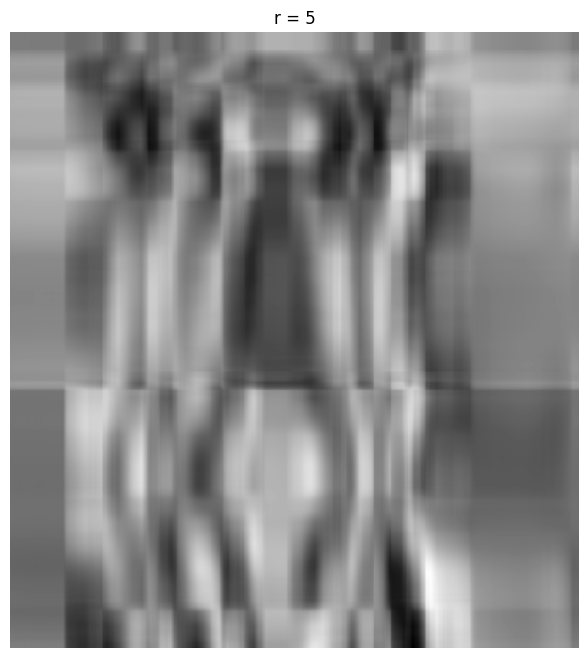

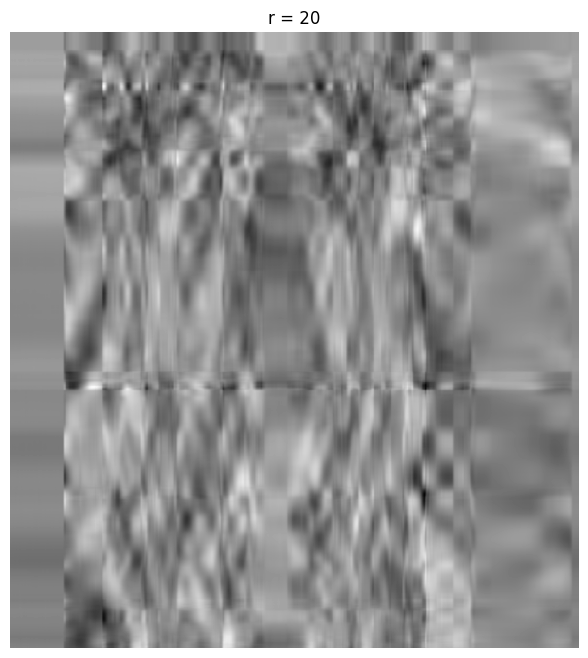

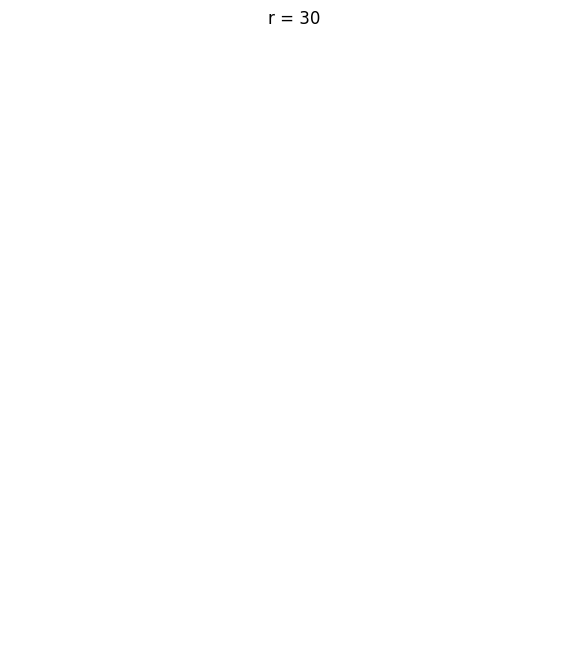

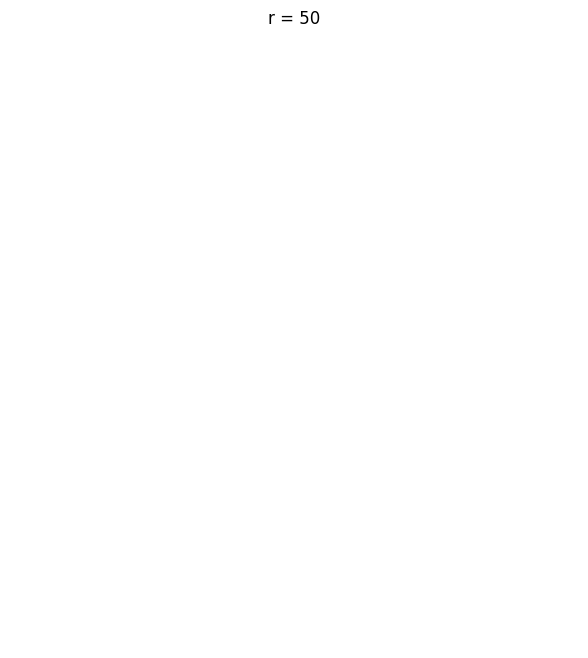

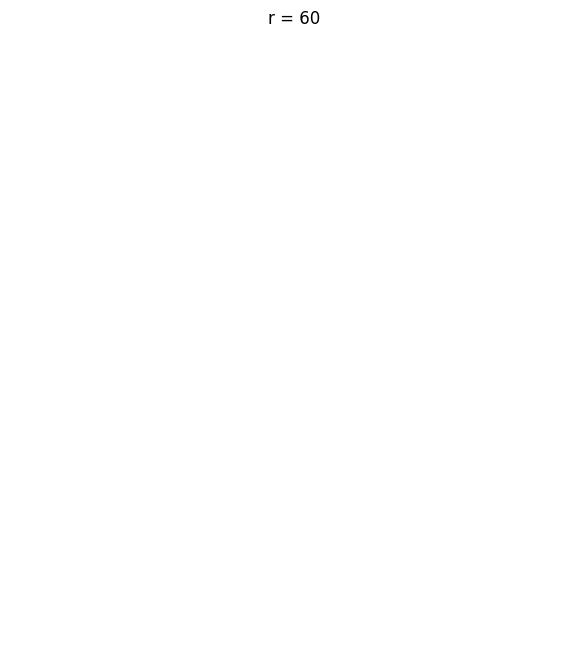

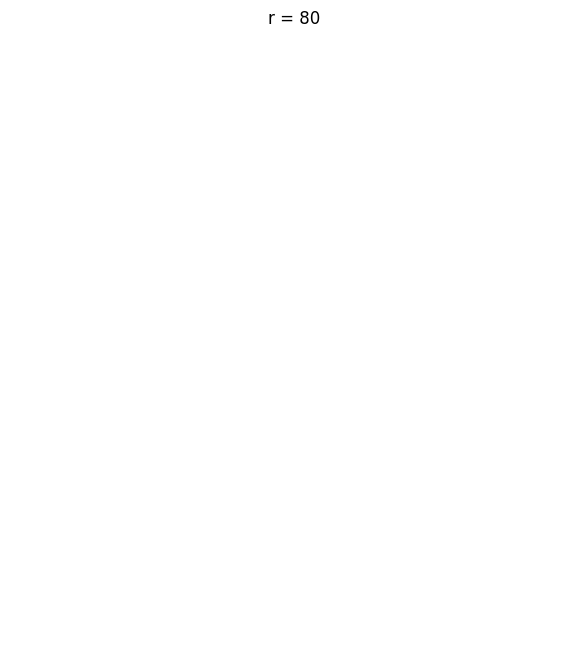

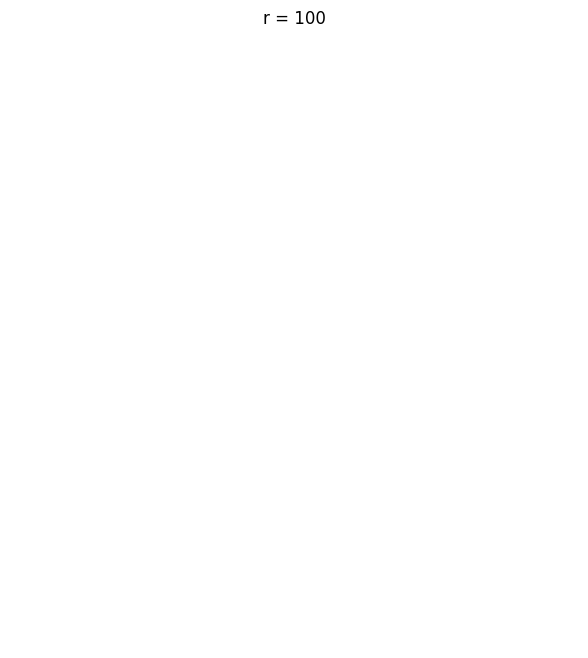

In [27]:
plt.rcParams['figure.figsize'] = [16, 8]
ruta = os.path.expanduser('~/Proyectos/SVD-Image_Compression/camello_shrigley.jpg')
patos = imread(ruta)

#Para que sea en blanco y negro, tiene que ser en blanco y negro para que se pueda multiplicar las matrices
imagen_gris = np.mean(patos, axis=-1)

# Mostrar la imagen en escala de grises
plt.rcParams['figure.figsize'] = [16, 8]
img = plt.imshow(imagen_gris, cmap='gray')
plt.axis('off')
plt.show()

# Realizar la descomposición SVD
#U, S, Vt = descomposicion_en_valores_singulares(imagen_gris)

U = calculU(imagen_gris)
Sigma = calculSigma(imagen_gris)
Vt = calculVt(imagen_gris)

S = np.diag(Sigma)

j = 0
for r in (5, 20, 30, 50, 60, 80, 100):
    img_approx = U[:,:r] @ S[0:r,:r] @ Vt[:r, :]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(img_approx)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = '+str(r))
    plt.show()

